**Module**: Computer Vision

**Name**: Priyanka Balakrishna Hejmadi 

# Part A

DOMAIN: Botanical Research

PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a photo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### 1. Import and Understand the data [12 Marks]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]
project_path = "/content/drive/My Drive/"
images_zip_path = project_path + "plant_seedlings_classification.zip"

from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

In [4]:
# B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]
## Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..
from glob import glob
import cv2
images_path = '/content/plant-seedlings-classification/train/*/*.png'
images = glob(images_path)
train_images = []
train_labels = []
image_name = []

for img in images:
    train_images.append(img)
    train_labels.append(img.split('/')[-2])
    image_name.append(img.split('/')[-1])

df = pd.DataFrame(list(zip(train_images, train_labels, image_name)), columns=['Image','Label','Image_name'])

In [5]:
df.head()

,Image,Label,Image_name
0,/content/plant-seedlings-classification/train/...,Charlock,1f6df012f.png
1,/content/plant-seedlings-classification/train/...,Charlock,5d820b1cb.png
2,/content/plant-seedlings-classification/train/...,Charlock,b525a32bc.png
3,/content/plant-seedlings-classification/train/...,Charlock,6fa73fdf6.png
4,/content/plant-seedlings-classification/train/...,Charlock,6266112a8.png


In [6]:
# C. Write a function that will select n random images and display images along with its species. [4 Marks]
## Hint: If input for function is 5, it should print 5 random images along with its labels.
import random
def show_image(df,n):

  indices = random.sample(range(0,df.shape[0]), n)
  
  for i in range(0,len(indices)):
    img = cv2.imread(df['Image'][indices[i]])
    print("Species:",df['Label'][indices[i]])
    plt.imshow(img)
    plt.show()

Species: Fat Hen


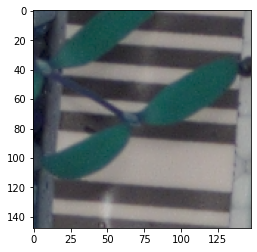

Species: Fat Hen


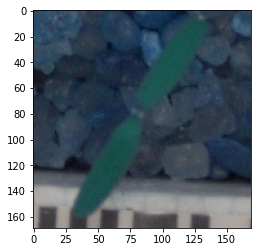

Species: Loose Silky-bent


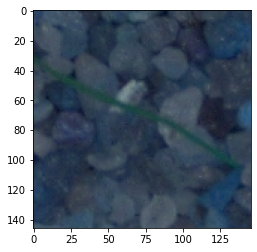

Species: Loose Silky-bent


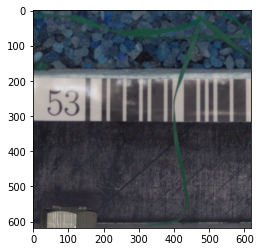

Species: Fat Hen


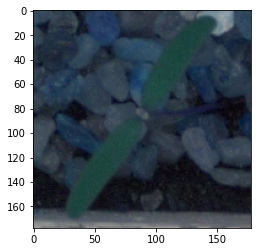

Species: Small-flowered Cranesbill


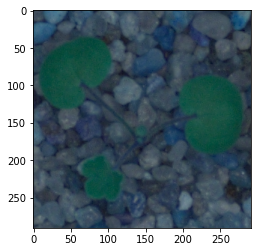

In [7]:
show_image(df, 6)

#### **2**. Data preprocessing [8 Marks]

In [8]:
# A. Create X & Y from the DataFrame. [2 Marks]
X = df['Image']
Y = df['Label']

In [9]:
X.head()

0    /content/plant-seedlings-classification/train/...
1    /content/plant-seedlings-classification/train/...
2    /content/plant-seedlings-classification/train/...
3    /content/plant-seedlings-classification/train/...
4    /content/plant-seedlings-classification/train/...
Name: Image, dtype: object

In [10]:
Y.nunique()

12

In [11]:
Y.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

In [12]:
# B. Encode labels of the images. [2 Marks]
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
le.fit(Y)
encoded_labels = le.transform(Y)
train_label = np_utils.to_categorical(encoded_labels)

In [13]:
train_label[10]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
# C. Unify shape of all the images. [2 Marks]
Z=[]
for i in range(0,len(X)):
  Z.append(cv2.resize(cv2.imread(X[i]), (64,64)))
X = np.asarray(Z)

In [15]:
X.shape

(4750, 64, 64, 3)

In [16]:
# D. Normalise all the images. [2 Marks]
X = X.astype('float32') / 255

#### 3. Model training [10 Marks]

In [17]:
# A. Split the data into train and test data. [2 Marks]
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, train_label,test_size=0.2,random_state=42, stratify=train_label)

In [18]:
# B. Create new CNN architecture to train the model. [4 Marks]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

model_1 = Sequential()

model_1.add(Conv2D(filters=12, kernel_size=(3,3), input_shape=(64,64, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(filters=12, kernel_size=(3,3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))
model_1.add(Flatten())
model_1.add(Dense(32, activation="relu"))

model_1.add(Dense(12, activation="softmax"))

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 12)        336       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 12)        1308      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 12)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 12)        0         
                                                                 
 flatten (Flatten)           (None, 2352)              0

In [19]:
# C. Train the model on train data and validate on test data. [2 Marks]
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model_1.fit(X_train, y_train, batch_size=50, 
                    epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
76/76 [==============================] - 8s 9ms/step - loss: 2.4405 - accuracy: 0.1471 - val_loss: 2.3785 - val_accuracy: 0.1737
Epoch 2/50
76/76 [==============================] - 0s 6ms/step - loss: 2.2947 - accuracy: 0.2045 - val_loss: 2.1802 - val_accuracy: 0.2611
Epoch 3/50
76/76 [==============================] - 0s 6ms/step - loss: 2.0098 - accuracy: 0.3242 - val_loss: 1.8435 - val_accuracy: 0.3589
Epoch 4/50
76/76 [==============================] - 0s 6ms/step - loss: 1.7025 - accuracy: 0.4118 - val_loss: 1.5441 - val_accuracy: 0.4495
Epoch 5/50
76/76 [==============================] - 0s 6ms/step - loss: 1.4792 - accuracy: 0.4795 - val_loss: 1.3898 - val_accuracy: 0.5326
Epoch 6/50
76/76 [==============================] - 0s 6ms/step - loss: 1.3592 - accuracy: 0.5145 - val_loss: 1.3121 - val_accuracy: 0.5200
Epoch 7/50
76/76 [==============================] - 0s 6ms/step - loss: 1.2755 - accuracy: 0.5518 - val_loss: 1.2785 - val_accuracy: 0.5600
Epoch 8/50
76/76 [==

In [21]:
score, acc = model_1.evaluate(X_test,y_test)

30/30 [==============================] - 0s 5ms/step - loss: 0.9384 - accuracy: 0.7137


In [22]:
print('Validation score:', score,'   Validation accuracy:', acc)

Validation score: 0.9384075999259949    Validation accuracy: 0.7136842012405396


# D. Select a random image and print actual label and predicted label for the same. [2 Marks]

In [23]:
# D. Select a random image and print actual label and predicted label for the same. [2 Marks]
k = random.randint(0,(len(X_test)))
k

300

In [24]:
y_pred = model_1.predict(X_test[k].reshape(1,64,64,3))

In [25]:
print(y_pred.argmax())

8


In [26]:
y_test[k].argmax()

8

# Part B

PROJECT OBJECTIVE: To experiment with various approaches to train an image classifier to predict type of flower from the image.

1. Import and Understand the data [5 Marks]





In [27]:
# A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]
!pip install tflearn
from tflearn.datasets import oxflower17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Instructions for updating:
non-resource variables are not supported in the long term


In [28]:
x, y = oxflower17.load_data(one_hot=False)

In [29]:
# B. Print Number of images and shape of the images. [1 Marks]
print("Number of Images:", len(x))

Number of Images: 1360


In [30]:
print("Shape of Images:", x.shape[1:])

Shape of Images: (224, 224, 3)


In [31]:
# C. Print count of each class from y. [2 Marks]
y1 = pd.DataFrame(y)
print("Counts of classes:\n ", y1.value_counts())

Counts of classes:
  0     80
9     80
15    80
14    80
13    80
12    80
11    80
10    80
8     80
1     80
7     80
6     80
5     80
4     80
3     80
2     80
16    80
dtype: int64


2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]

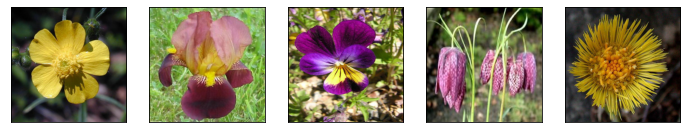

In [32]:
# A. Display 5 random images. [1 Marks]
from random import randint
plt.figure(figsize=(12,12))
for i in range(0,5):
  k= randint(0,len(x))
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[k],cmap=plt.cm.binary)

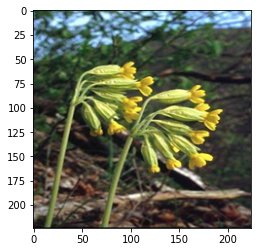

In [33]:
# B. Select any image from the dataset and assign it to a variable. [1 Marks]
test_image = x[45]
plt.imshow(test_image)

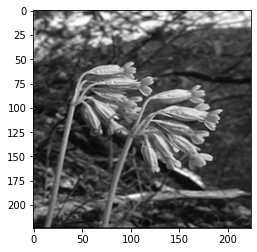

In [34]:
# C. Transform the image into grayscale format and display the same. [3 Marks]
import cv2
from google.colab.patches import cv2_imshow
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image)
plt.gray()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Sharpened')

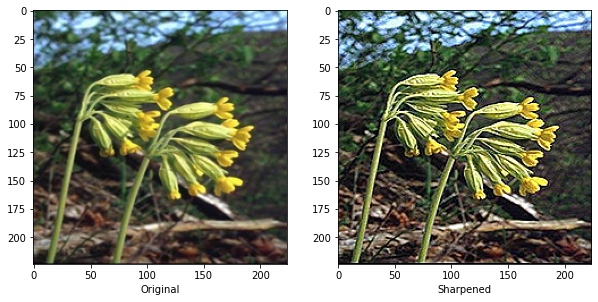

In [35]:
# D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]
sharp_kernel = np.array([[0, -1, 0],
                        [-1, 5,-1],
                        [0, -1, 0]])
Sharp_image = cv2.filter2D(src=test_image, ddepth=-1, kernel=sharp_kernel)

plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(1,2,1)
plt.imshow(np.asarray(test_image))
plt.xlabel('Original')
plt.subplot(1,2,2)
plt.imshow(np.asarray(Sharp_image))
plt.xlabel('Sharpened')

Text(0.5, 0, 'Blurred')

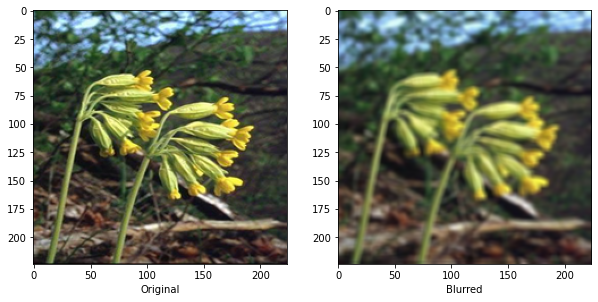

In [36]:
# E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]

Blur_image = cv2.blur(src=test_image, ksize=(5,5))

plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
#plt.grid(False)
plt.subplot(1,2,1)
plt.imshow(np.asarray(test_image))
plt.xlabel('Original')
plt.subplot(1,2,2)
plt.imshow(np.asarray(Blur_image))
plt.xlabel('Blurred')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Blurred')

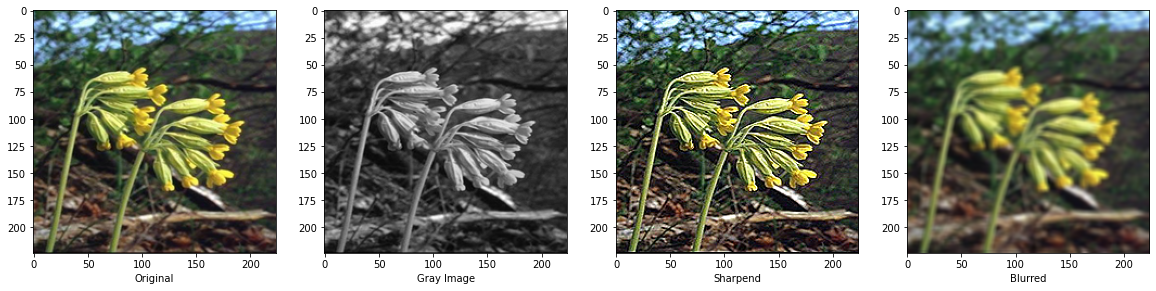

In [37]:
# F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]
plt.figure(figsize=(20,10))
plt.xticks([])
plt.yticks([])
#plt.grid(False)
plt.subplot(1,4,1)
plt.imshow(np.asarray(test_image))
plt.xlabel('Original')
plt.subplot(1,4,2)
plt.imshow(np.asarray(gray_image))
plt.xlabel('Gray Image')
plt.subplot(1,4,3)
plt.imshow(np.asarray(Sharp_image))
plt.xlabel('Sharpend')
plt.subplot(1,4,4)
plt.imshow(np.asarray(Blur_image))
plt.xlabel('Blurred')

#### 3. Model training and Tuning: [15 Marks]

In [38]:
# A. Split the data into train and test with 80:20 proportion. [2 Marks]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [39]:
print("Shape of x_train", x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (1088, 224, 224, 3)
Shape of x_test (272, 224, 224, 3)
Shape of y_train (1088,)
Shape of y_test (272,)


In [40]:
num_classes=y1.nunique()
print(num_classes)

0    17
dtype: int64


In [41]:
#One hot encoding the train labels and test labels
import tensorflow as tf



In [42]:
# B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

# Using KNN algorithmn.
n_s, n_x, n_y, n_c = x_train.shape              #Flattening the vector to input into KNN
x_train_f = x_train.reshape(n_s, n_x*n_y*n_c)
print("Flattened x_train shape:", x_train_f.shape)
n_s1, n_x, n_y, n_c = x_test.shape
x_test_f = x_test.reshape(n_s1, n_x*n_y*n_c)
print("Flattened x_test shape", x_test_f.shape)

Flattened x_train shape: (1088, 150528)
Flattened x_test shape (272, 150528)


In [43]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 2 , weights = 'distance' )

NNH.fit(x_train_f, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [44]:
predicted_labels = NNH.predict(x_test_f)
NNH.score(x_test_f, y_test)

0.29411764705882354

In [45]:
from sklearn.metrics import accuracy_score, classification_report

print("Testing accuracy: {}".format(accuracy_score(y_test,predicted_labels)))

report = classification_report(y_test,predicted_labels)
print(report)

Testing accuracy: 0.29411764705882354
              precision    recall  f1-score   support

           0       0.13      0.20      0.16        10
           1       0.33      0.06      0.10        18
           2       0.64      0.41      0.50        17
           3       0.33      0.20      0.25        20
           4       0.14      0.22      0.17         9
           5       0.13      0.27      0.18        15
           6       0.16      0.26      0.20        19
           7       0.53      0.44      0.48        18
           8       0.75      0.23      0.35        13
           9       0.17      0.26      0.21        19
          10       0.23      0.19      0.21        16
          11       0.00      0.00      0.00        12
          12       0.80      0.89      0.84        18
          13       0.14      0.06      0.09        16
          14       0.10      0.13      0.11        15
          15       0.19      0.44      0.26        16
          16       1.00      0.48      0.65

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

x_train_2=[]
for i in range(0,len(x_train)):
  x_train_2.append(cv2.resize(x_train[i], (56,56)))
x_train_2 = np.asarray(x_train_2)

x_test_2=[]
for i in range(0,len(x_test)):
  x_test_2.append(cv2.resize(x_test[i], (56,56)))
x_test_2 = np.asarray(x_test_2)




In [47]:
y_train = tf.keras.utils.to_categorical(y_train,17) 
y_test = tf.keras.utils.to_categorical(y_test,17)

In [48]:
x_train_2.shape

(1088, 56, 56, 3)

In [49]:
from keras.layers import BatchNormalization

In [50]:
model_nn = Sequential()
model_nn.add(Dense(64, input_shape=(56,56,3), activation='relu'))
#model_nn.add(BatchNormalization())
model_nn.add(Dense(64, activation='relu'))
#model_nn.add(BatchNormalization())
#model_nn.add(Dropout(0.25))
model_nn.add(Flatten())
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(17, activation='softmax'))

In [51]:
model_nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 56, 56, 64)        256       
                                                                 
 dense_3 (Dense)             (None, 56, 56, 64)        4160      
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                6422560   
                                                                 
 dense_5 (Dense)             (None, 17)                561       
                                                                 
Total params: 6,427,537
Trainable params: 6,427,537
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
 model_nn.fit(x_train_2, y_train, epochs=50, batch_size=50, verbose= 1)

Train on 1088 samples
Epoch 1/50
1088/1088 [==============================] - 0s 352us/sample - loss: 3.4548 - acc: 0.0836
Epoch 2/50
1088/1088 [==============================] - 0s 279us/sample - loss: 2.7069 - acc: 0.1278
Epoch 3/50
1088/1088 [==============================] - 0s 272us/sample - loss: 2.5908 - acc: 0.1314
Epoch 4/50
1088/1088 [==============================] - 0s 269us/sample - loss: 2.4337 - acc: 0.1691
Epoch 5/50
1088/1088 [==============================] - 0s 278us/sample - loss: 2.2761 - acc: 0.2656
Epoch 6/50
1088/1088 [==============================] - 0s 273us/sample - loss: 2.1311 - acc: 0.3447
Epoch 7/50
1088/1088 [==============================] - 0s 268us/sample - loss: 1.9851 - acc: 0.3860
Epoch 8/50
1088/1088 [==============================] - 0s 262us/sample - loss: 1.7877 - acc: 0.4476
Epoch 9/50
1088/1088 [==============================] - 0s 310us/sample - loss: 1.5941 - acc: 0.5138
Epoch 10/50
1088/1088 [==============================] - 0s 336us/sam

In [54]:
loss, acc = model_nn.evaluate(x_test_2, y_test)
print("Test loss and accuracy:",loss,acc)

loss, acc = model_nn.evaluate(x_train_2, y_train)
print("Train loss and accuracy:",loss,acc)

Test loss and accuracy: 4.939684559317196 0.3897059


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train loss and accuracy: 0.033909340245265734 0.9880515


In [55]:
# D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]
model_cnn = Sequential()

model_cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(56,56, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation="relu"))

model_cnn.add(Dense(17, activation="softmax"))

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 54, 54, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 32)       

In [56]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
 model_cnn.fit(x_train_2, y_train, epochs=50, batch_size=50, verbose= 1)

Train on 1088 samples
Epoch 1/50
1088/1088 [==============================] - 1s 899us/sample - loss: 2.7927 - acc: 0.0846
Epoch 2/50
1088/1088 [==============================] - 0s 161us/sample - loss: 2.5452 - acc: 0.1342
Epoch 3/50
1088/1088 [==============================] - 0s 186us/sample - loss: 2.3278 - acc: 0.2298
Epoch 4/50
1088/1088 [==============================] - 0s 188us/sample - loss: 2.1253 - acc: 0.2656
Epoch 5/50
1088/1088 [==============================] - 0s 193us/sample - loss: 1.8853 - acc: 0.3520
Epoch 6/50
1088/1088 [==============================] - 0s 188us/sample - loss: 1.7303 - acc: 0.3842
Epoch 7/50
1088/1088 [==============================] - 0s 141us/sample - loss: 1.6142 - acc: 0.4274
Epoch 8/50
1088/1088 [==============================] - 0s 170us/sample - loss: 1.4862 - acc: 0.4743
Epoch 9/50
1088/1088 [==============================] - 0s 188us/sample - loss: 1.3860 - acc: 0.5202
Epoch 10/50
1088/1088 [==============================] - 0s 182us/sam

In [58]:
loss, acc = model_cnn.evaluate(x_test_2, y_test)
print("Test loss and accuracy:",loss,acc)

loss, acc = model_cnn.evaluate(x_train_2, y_train)
print("\n\nTrain loss and accuracy:",loss,acc)

Test loss and accuracy: 1.964883755235111 0.6213235


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates




Train loss and accuracy: 0.06323245586827397 0.9880515


In [59]:
# E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]
# The best performing model id CNN as it gave a validation accuracy of about 62%
image_path= project_path + 'Prediction_Flower.jpg'
flower=cv2.imread(image_path)


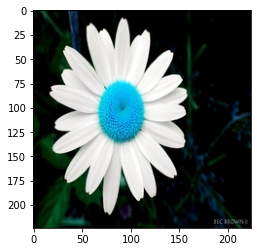

In [60]:
plt.imshow(flower)

In [61]:
flower2 = cv2.resize(flower, (56,56))
flower2.shape

(56, 56, 3)

In [62]:
f_pred = model_cnn.predict(flower2.reshape(1,56,56,3))

print(np.argmax(f_pred))

7


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
